# Data processing 

In [31]:
#importing libraries needed
import csv
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt



In [62]:
#open the dataset i got from kaggle, containing over 57000 books
books = pd.read_csv('books.csv', delimiter=',')
books.head()

,ISBN,Title,Author,Year,Publisher,Blurb
0,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,"Here, for the first time in paperback, is an o..."
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"The fascinating, true story of the world's dea..."
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,Winnie and Helen have kept each others worst s...
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,Historians and inquisitive laymen alike love t...
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,This highly praised first novel by fiction wri...


In [63]:
books.shape

(57510, 6)

In [65]:
#get rid of any duplicates
book = b_books.drop_duplicates(subset='Title', keep="first")
book.shape

(52307, 6)

Since i also want the pictures of the books recommended, I also have to find a data set containing the cover picture of the books. This i found on the http://www2.informatik.uni-freiburg.de/~cziegler/BX/ website. This dataset containing the URL to the book cover of 271360 books, besides URL to the bookcover the data set also contained the ISBN number, the author, year of publication and publisher. Next step is then to load this data set and merge this to the data set books_df2. Since both data sets have ISBN-numbers i can use this to merge them together.

In [67]:
books_df1 = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books_df1.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 
                 'imageUrlS', 'imageUrlM', 'imageUrlL']
books_df1.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [70]:
#Merge the two data sets thogether with pd.merge
merged = pd.merge(b_books, all_books, how='inner', on=['ISBN'])

In [71]:
#get rid of the columns that i don't need 
merged = merged[['ISBN', 'Title', 'Author', 'Year', 'Publisher', 'Blurb', 'imageUrlL']]


From det data extrcted from http://www2.informatik.uni-freiburg.de/~cziegler/BX/, we also get a CSV-file with ratings of the books, i will also use this to add ratings to the books.

In [72]:
#open the ratings data set
all_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
all_ratings.columns = ['userID', 'ISBN', 'bookRating']


In [73]:
#calculating the mean rating of each book by gouping the isbn-number and also counting the number of ratings each book has gotten 
average_rating = pd.DataFrame(all_ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(all_ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [74]:
#merge this data set to the original data set 
merged = pd.merge(merged, average_rating, how='inner', on=['ISBN'])
merged.rename(columns={'bookRating':'averageRating'}, inplace=True)
merged.head()

,ISBN,Title,Author,Year,Publisher,Blurb,imageUrlL,averageRating,ratingCount
0,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,"Here, for the first time in paperback, is an o...",http://images.amazon.com/images/P/0060973129.0...,5.000000,3
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"The fascinating, true story of the world's dea...",http://images.amazon.com/images/P/0374157065.0...,4.272727,11
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,Winnie and Helen have kept each others worst s...,http://images.amazon.com/images/P/0399135782.0...,4.212121,33
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,Historians and inquisitive laymen alike love t...,http://images.amazon.com/images/P/0425176428.0...,1.600000,5
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,This highly praised first novel by fiction wri...,http://images.amazon.com/images/P/1881320189.0...,4.666667,3


To get a better description of the blurbs, i made a wordcounter for the blurbs. We can see there are at least one blurb that only have a wordcount of 1 and 25% of the blurbs have a wordcount under 52. We can also see that the biggest blurb is 2679 words long, this is probably a outlier since we can clearly see that the mean is 113 words and the 75 percentile is 152 words. Because of this i decided to get rid of blurbs that are under 50 words and over 500 words as threshold.

In [75]:
merged['wordCount'] = books['Blurb'].apply(lambda x: len(str(x).split()))

In [76]:
merged['wordCount'].describe()

count    57510.000000
mean       113.636324
std         80.884984
min          1.000000
25%         52.000000
50%         98.000000
75%        152.000000
max       2679.000000
Name: wordCount, dtype: float64

(array([1.5374e+04, 1.6442e+04, 1.3319e+04, 6.8310e+03, 2.8180e+03,
        1.4210e+03, 6.9400e+02, 3.1900e+02, 1.2000e+02, 8.1000e+01,
        4.1000e+01, 1.4000e+01, 9.0000e+00, 1.0000e+01, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 5.45600e+01, 1.08120e+02, 1.61680e+02, 2.15240e+02,
        2.68800e+02, 3.22360e+02, 3.75920e+02, 4.29480e+02, 4.83040e+02,
        5.36600e+02, 5.90160e+02, 6.43720e+02, 6.97280e+02, 7.50840e+02,
        8.04400e+02, 8.57960e+02, 9.11520e+02, 9.65080e+02, 1.01864e+03,
        1.07220e+03, 1.125

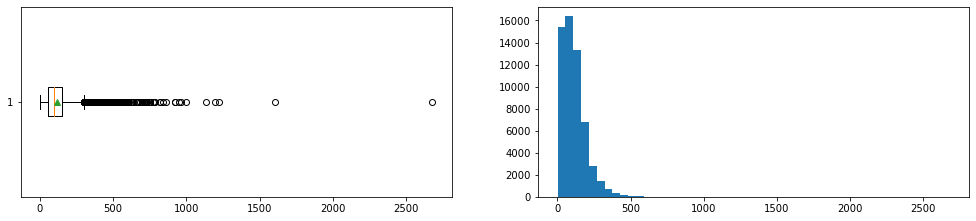

In [77]:
fig, axes = plt.subplots(1,2, figsize=(17,3.5))
axes[0].boxplot(merged.wordCount, showmeans=True,vert=False)
axes[1].hist(merged.wordCount, cumulative=False, bins=50, histtype='bar')

In [80]:
#makes a new data frame with only the observations that have a wordcouunt over 50 and under 500
merged_df1 = merged.loc[merged['wordCount'].isin(range(50,500))]

In [81]:
merged_df1.shape

(44306, 10)

Clean the blurbs with the help of regular expression, and get rid of numbers, punctuation and links

In [82]:
merged_df2 = merged_df1.copy()
merged_df2['cleanedBlurb'] = merged_df2['Blurb'].str.lower()
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].replace(r'@\w+', '', regex=True)
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].replace(r'http\S+', '', regex=True)
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].replace(r'[0-9]+', '', regex=True)
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].replace(r'www.[^ ]+', '', regex=True)

In [83]:
#Remove stopwords from the blurbs
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].fillna("").astype('str')
stop_words = set(stopwords.words('english'))
merged_df2['cleanedBlurb'] = merged_df2['cleanedBlurb'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                          if word not in stop_words]))

In [84]:
merged_df2.head()

,ISBN,Title,Author,Year,Publisher,Blurb,imageUrlL,averageRating,ratingCount,wordCount,cleanedBlurb
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"The fascinating, true story of the world's dea...",http://images.amazon.com/images/P/0374157065.0...,4.272727,11,180,fascinating true story world's deadliest disea...
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,Winnie and Helen have kept each others worst s...,http://images.amazon.com/images/P/0399135782.0...,4.212121,33,94,winnie helen kept others worst secrets fifty y...
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,Historians and inquisitive laymen alike love t...,http://images.amazon.com/images/P/0425176428.0...,1.600000,5,63,historians inquisitive laymen alike love ponde...
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,This highly praised first novel by fiction wri...,http://images.amazon.com/images/P/1881320189.0...,4.666667,3,268,highly praised first novel fiction writer juli...
5,0440234743,The Testament,John Grisham,1999,Dell,"In a plush Virginia office, a rich, angry old ...",http://images.amazon.com/images/P/0440234743.0...,3.085308,422,152,plush virginia office rich angry old man furio...


In [86]:
#saves the data set to a csv that we are going to use late 
merged_df2.to_csv('/Users/aleksanderkaspersen/Documents/Skole/Master/Utveksling/Introduction to DH methods/Project/Data_processing3.csv')